# 1. introduction

## 1.1 about dataset

<p>this dataset is very suitable for analyzing the fuel consumption of cars due to a number of features. We will look at these features and analyze them.</p>

# 2. understand dataset

## 2.1 importing needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2.2 reading dataset file 

In [2]:
df = pd.read_csv("./mpg.csv")

## 2.3 get a summary about dataset varables 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


## 2.4 gain some data about dataset

In [4]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
df.shape

(234, 11)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
displ,234.0,3.471795,1.291959,1.6,2.4,3.3,4.6,7.0
year,234.0,2003.500000,4.509646,1999.0,1999.0,2003.5,2008.0,2008.0
cyl,234.0,5.888889,1.611534,4.0,4.0,6.0,8.0,8.0
cty,234.0,16.858974,4.255946,9.0,14.0,17.0,19.0,35.0
hwy,234.0,23.440171,5.954643,12.0,18.0,24.0,27.0,44.0


In [7]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

### 2.4.1 analysis result

<ol>
  <li><strong>dataset overview</strong>:
    <ul>
      <li>dataset contains 11 columns and 234 rows</li>
      <li>dataset contains both numerical and categorical variables</li>
    </ul>
  </li>

  <br />

  <li><strong>keys</strong>:
    <ul>
      <li><em>manufacturer</em>: the producer company name</li>
      <li><em>model</em>: the car model</li>
      <li><em>displ</em>: car engine capacity (displacement in liters)</li>
      <li><em>year</em>: year of manufacture of the car</li>
      <li><em>cyl</em>: number of car cylinders</li>
      <li><em>trans</em>: is the car auto or manual? (transmission type)</li>
      <li><em>drv</em>: drive train type (f = front-wheel drive, r = rear-wheel drive, 4 = 4-wheel drive)</li>
      <li><em>cty</em>: distance the car travels in the city with one gallon of gasoline (miles per gallon)</li>
      <li><em>hwy</em>: distance the car travels on the highway with one gallon of gasoline (miles per gallon)</li>
      <li><em>fl</em>: car fuel type (e = ethanol, d = diesel, r = regular, p = premium, c = CNG)</li>
      <li><em>class</em>: car class/type (compact, midsize, SUV, 2seater, minivan, pickup, subcompact)</li>
    </ul>
  </li>
  
<br />

  <li><strong>statistic analysis</strong>:
    <ul>
      <li><em>displ</em>: average of this dataset's <em>car engine capacity (in liters)</em> is around 3.5 with standard deviation 1.2, values change at 1.6 to 7.0 and quartiles are at 2.4, 3.3, and 4.6</li>
      <li><em>year</em>: average manufacturing year in this dataset is around 2004 with standard deviation 3.2, values range from 1999 to 2008 and quartiles are at 1999, 2004, and 2008</li>
      <li><em>cyl</em>: average number of cylinders is approximately 5.9 with standard deviation 1.6, values range from 4 to 8 cylinders and quartiles are at 4, 6, and 8</li>
      <li><em>cty</em>: average city fuel economy is about 16.9 mpg with standard deviation 4.3, values range from 9 to 35 mpg and quartiles are at 14, 17, and 19</li>
      <li><em>hwy</em>: average highway fuel economy is approximately 23.4 mpg with standard deviation 5.9, values range from 12 to 44 mpg and quartiles are at 18, 24, and 27</li>
    </ul>
  </li>
</ol>

## 2.5 looking for null, NaN values

In [8]:
df.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [9]:
df.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

### 2.5.1 result

<p>well there was no null and NaN rows, so we can continue.</p>

## 2.6 analysing unique values

In [19]:
pd.DataFrame(df.nunique(), columns=["unique values"])

,unique values
manufacturer,15
model,38
displ,35
year,2
cyl,4
trans,10
drv,3
cty,21
hwy,27
fl,5


### 2.6.1 getting categorical features

In [32]:
def get_categorical_features(dataFrame):
    categorical_features = []
    for i in dataFrame:
        if not pd.api.types.is_numeric_dtype(dataFrame[i].dtypes):
            categorical_features.append(i)
    return categorical_features

In [33]:
categorical_features = get_categorical_features(df)

### 2.6.2 getting unique value for each categorical feature

In [49]:
def get_categorical_unique(name:str, dataFrame:pd.DataFrame):
    print("*"*10, name, "*"*10)
    print(pd.DataFrame(dataFrame[name].unique(), columns=["unique values"]), end="\n\n\n")

In [50]:
for i in categorical_features:
    get_categorical_unique(i, df)

********** manufacturer **********
   unique values
0           audi
1      chevrolet
2          dodge
3           ford
4          honda
5        hyundai
6           jeep
7     land rover
8        lincoln
9        mercury
10        nissan
11       pontiac
12        subaru
13        toyota
14    volkswagen


********** model **********
             unique values
0                       a4
1               a4 quattro
2               a6 quattro
3       c1500 suburban 2wd
4                 corvette
5          k1500 tahoe 4wd
6                   malibu
7              caravan 2wd
8        dakota pickup 4wd
9              durango 4wd
10     ram 1500 pickup 4wd
11          expedition 2wd
12            explorer 4wd
13         f150 pickup 4wd
14                 mustang
15                   civic
16                  sonata
17                 tiburon
18      grand cherokee 4wd
19             range rover
20           navigator 2wd
21         mountaineer 4wd
22                  altima
23             

# 3 using plot for analysing dataset

## 3.1 model used by peaple

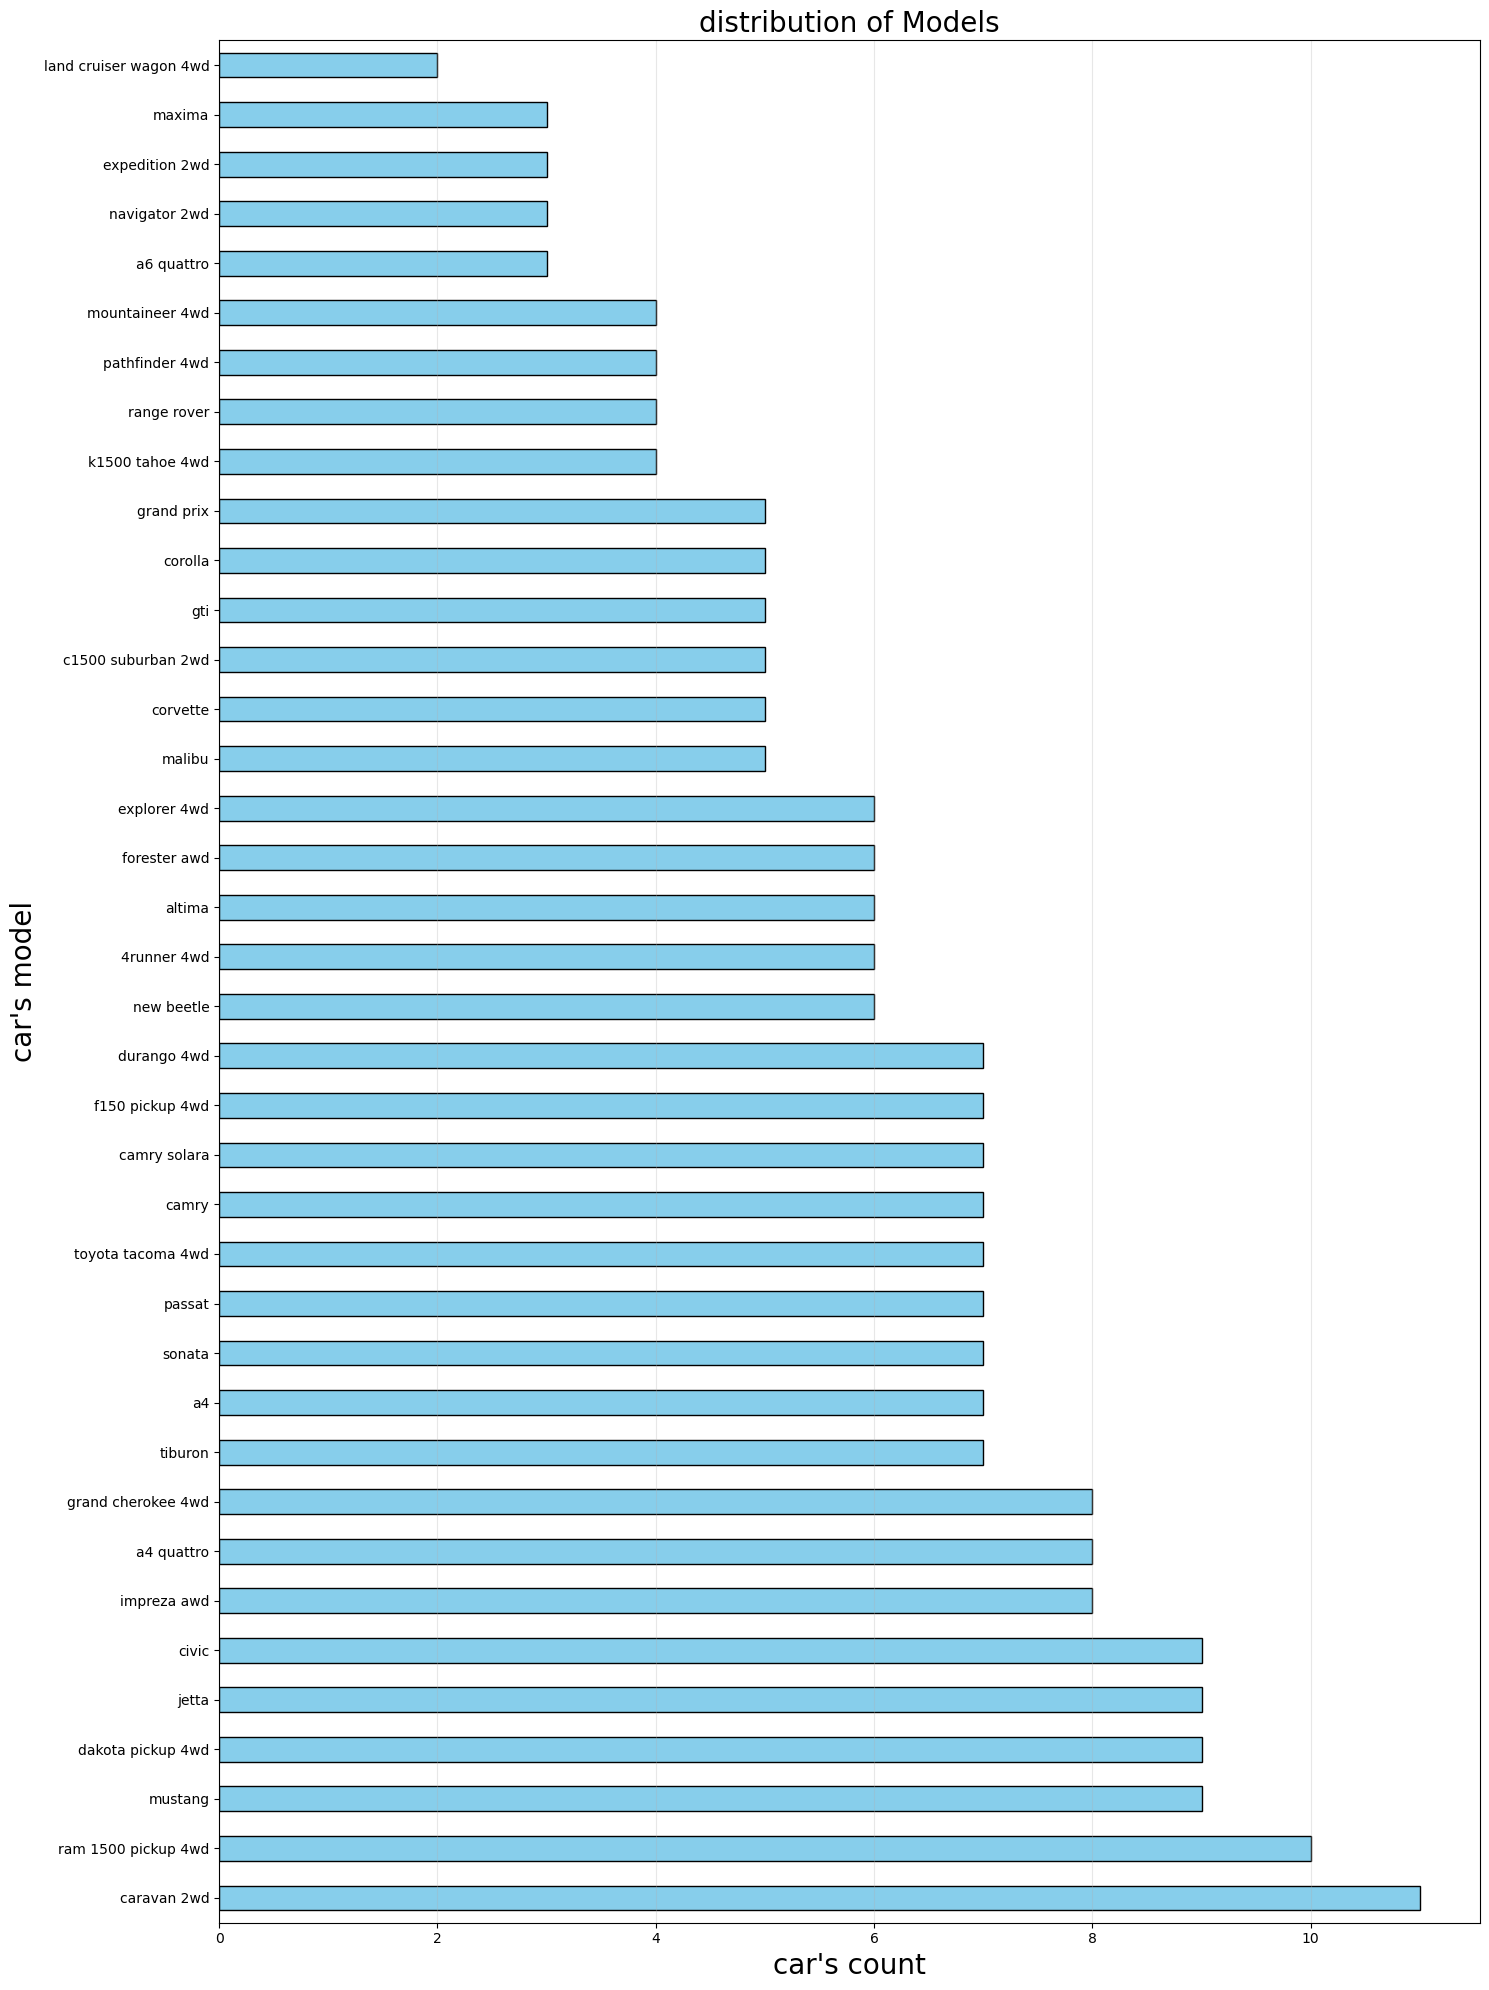

In [77]:
plt.figure(figsize=(15, 20))
counts = df['model'].value_counts()
counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("distribution of Models", fontsize=20)
plt.xlabel("car's count", fontsize=20)
plt.ylabel("car's model", fontsize=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 3.2 which model can drive most in city?

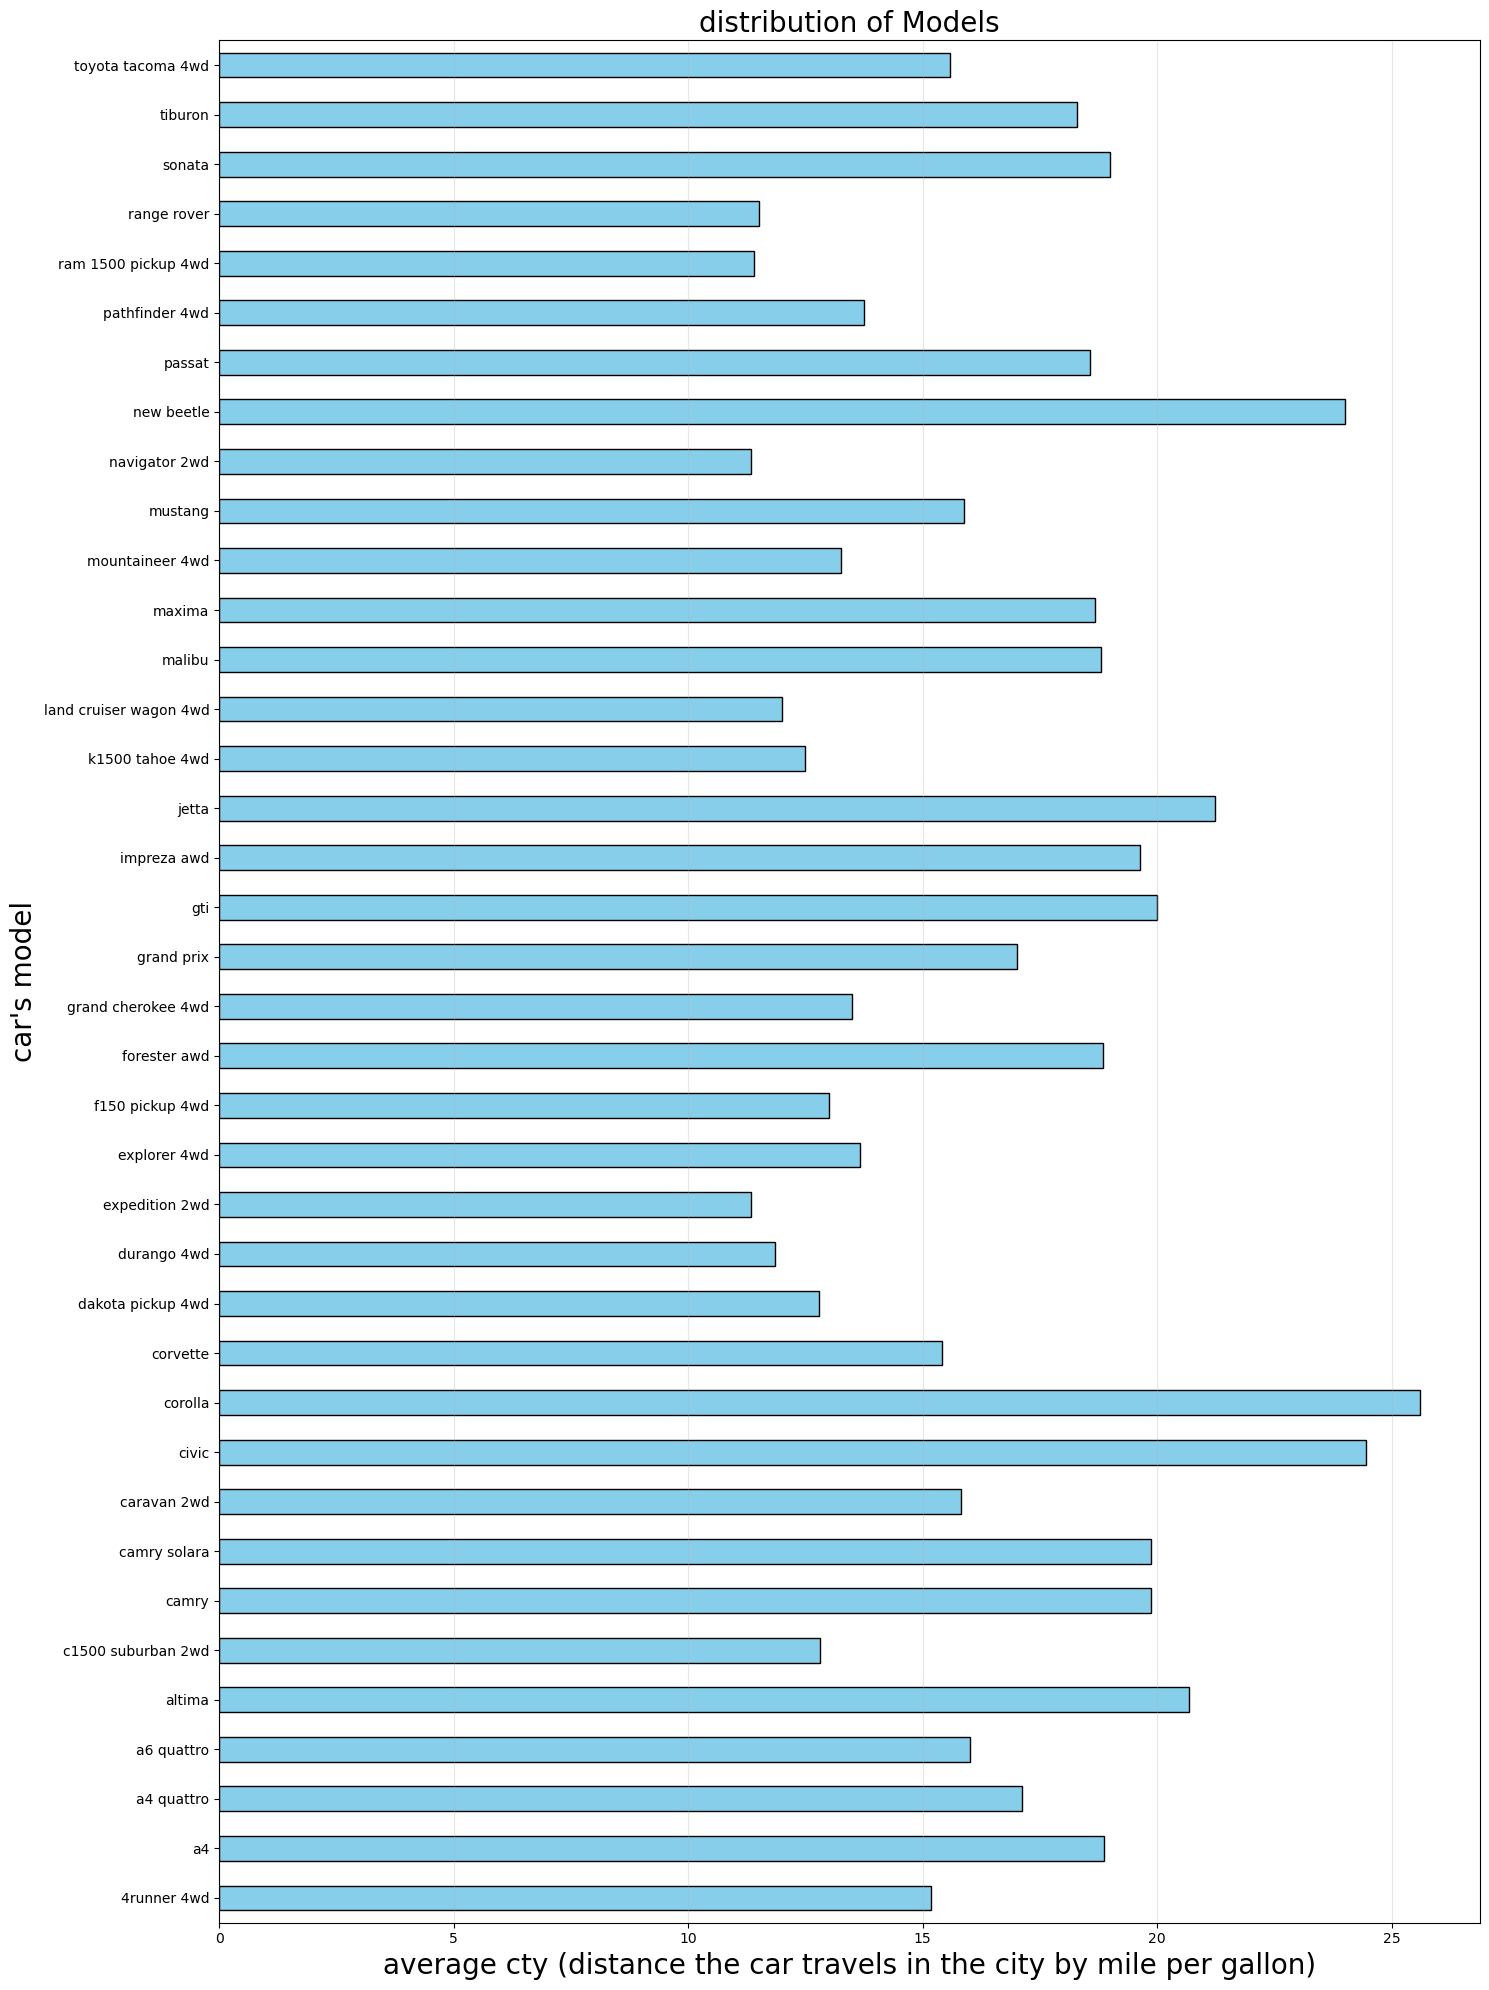

In [94]:
plt.figure(figsize=(15, 20))
model_cty = df.groupby(['model'])['cty'].mean()
model_cty.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("distribution of Models", fontsize=20)
plt.xlabel("average cty (distance the car travels in the city by mile per gallon)", fontsize=20)
plt.ylabel("car's model", fontsize=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 3.3 which model can drive most in highway?

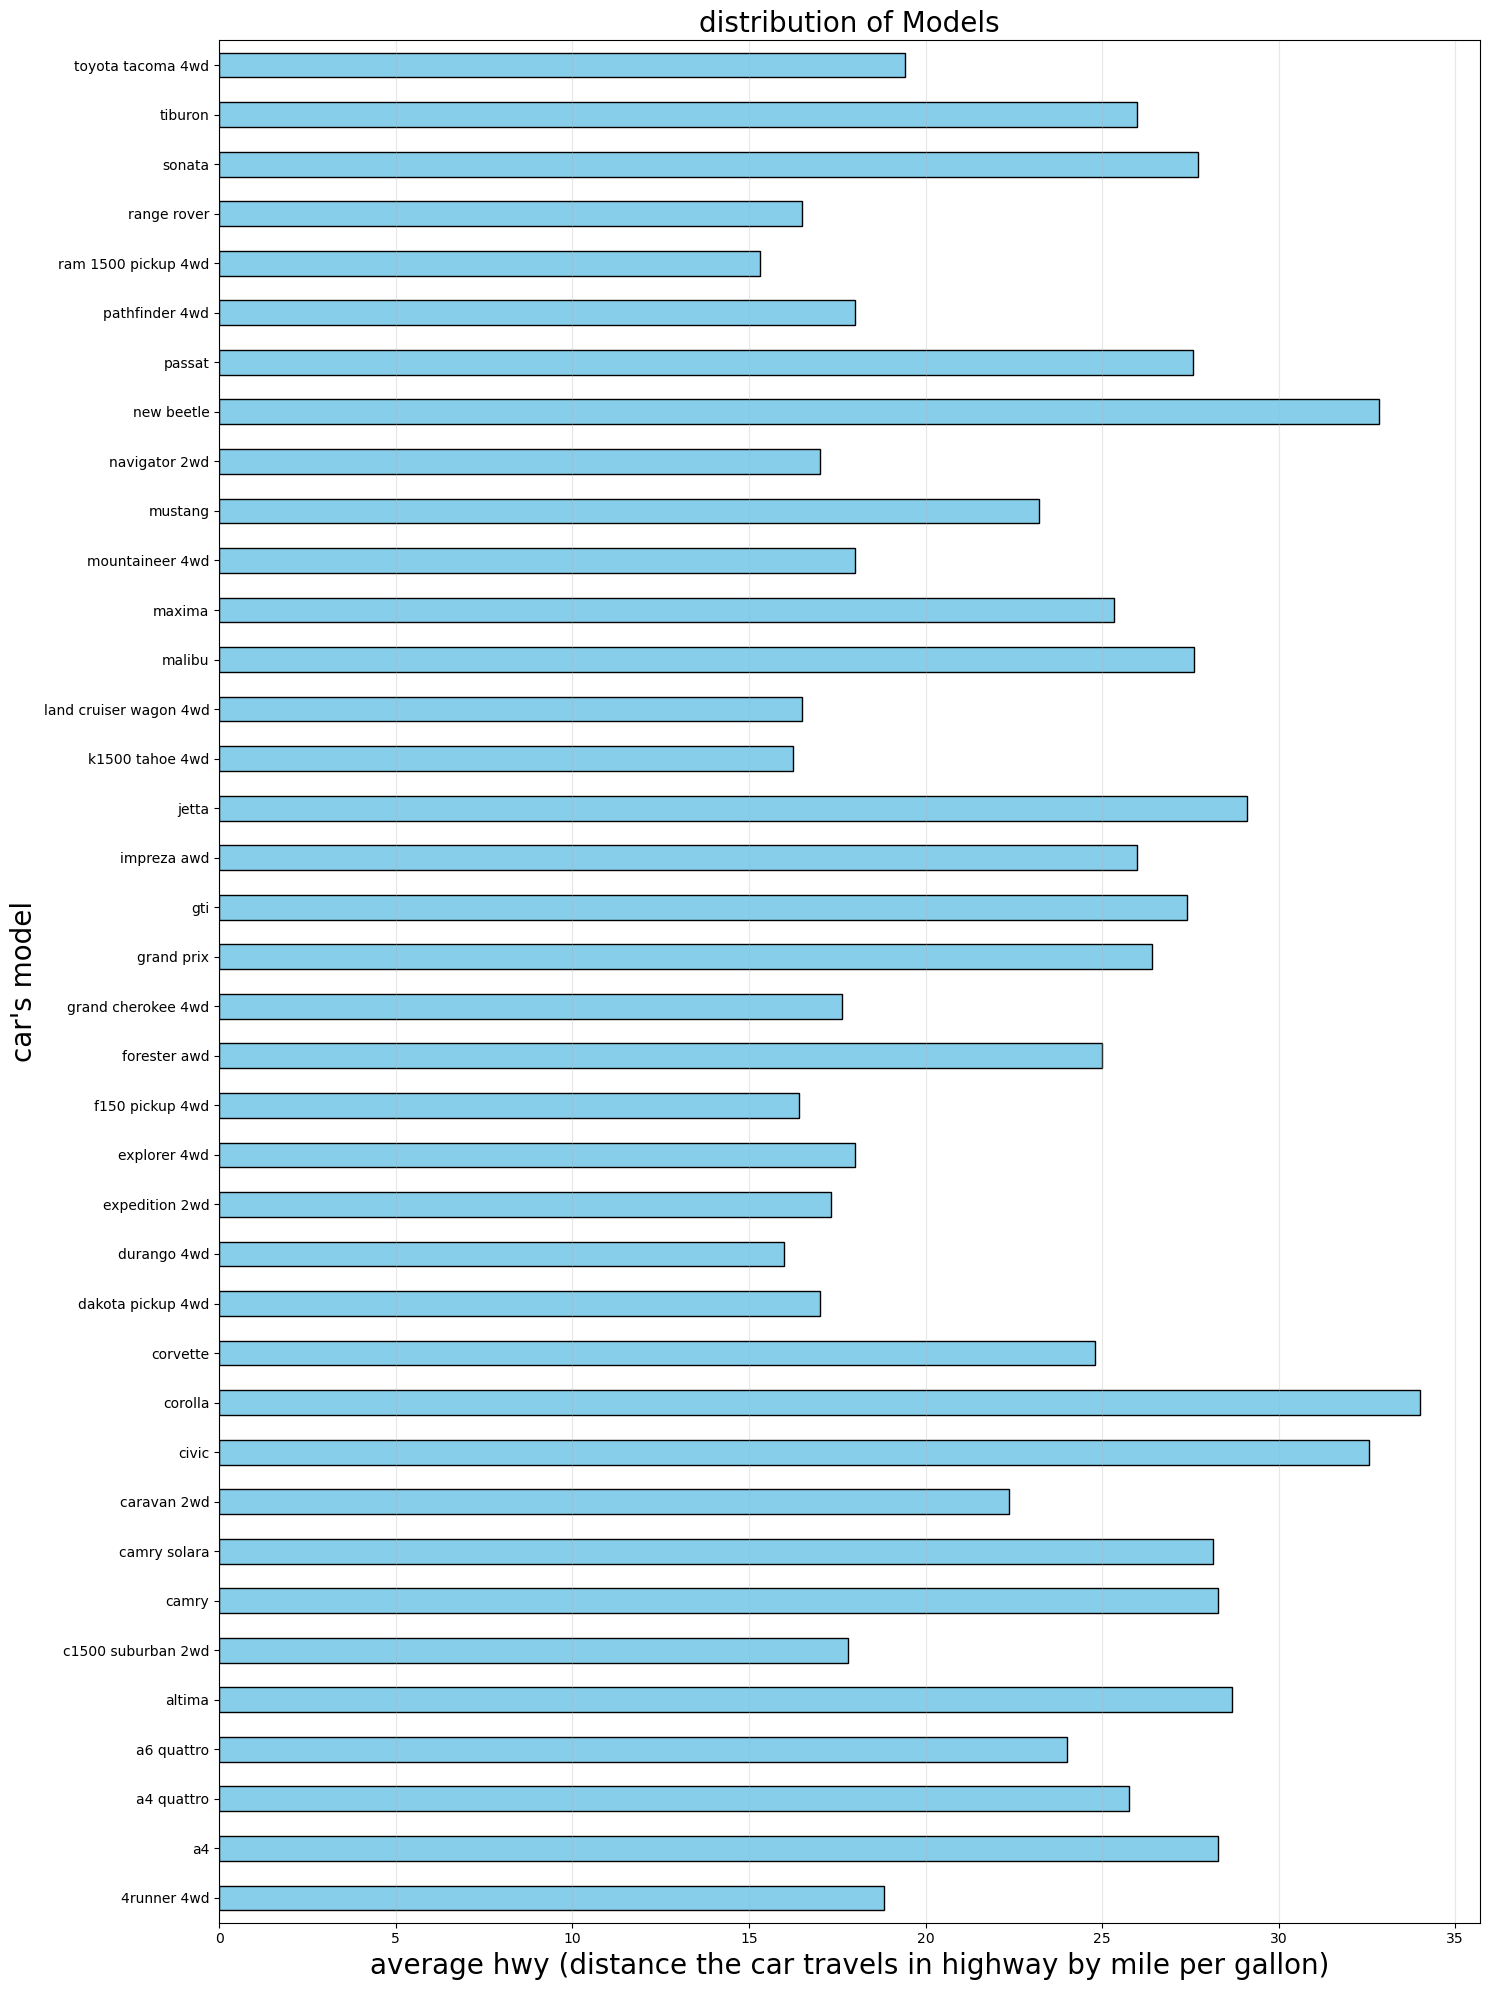

In [95]:
plt.figure(figsize=(15, 20))
model_cty = df.groupby(['model'])['hwy'].mean()
model_cty.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("distribution of Models", fontsize=20)
plt.xlabel("average hwy (distance the car travels in highway by mile per gallon)", fontsize=20)
plt.ylabel("car's model", fontsize=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 3.4 from which manufacturer peaple use most cars?

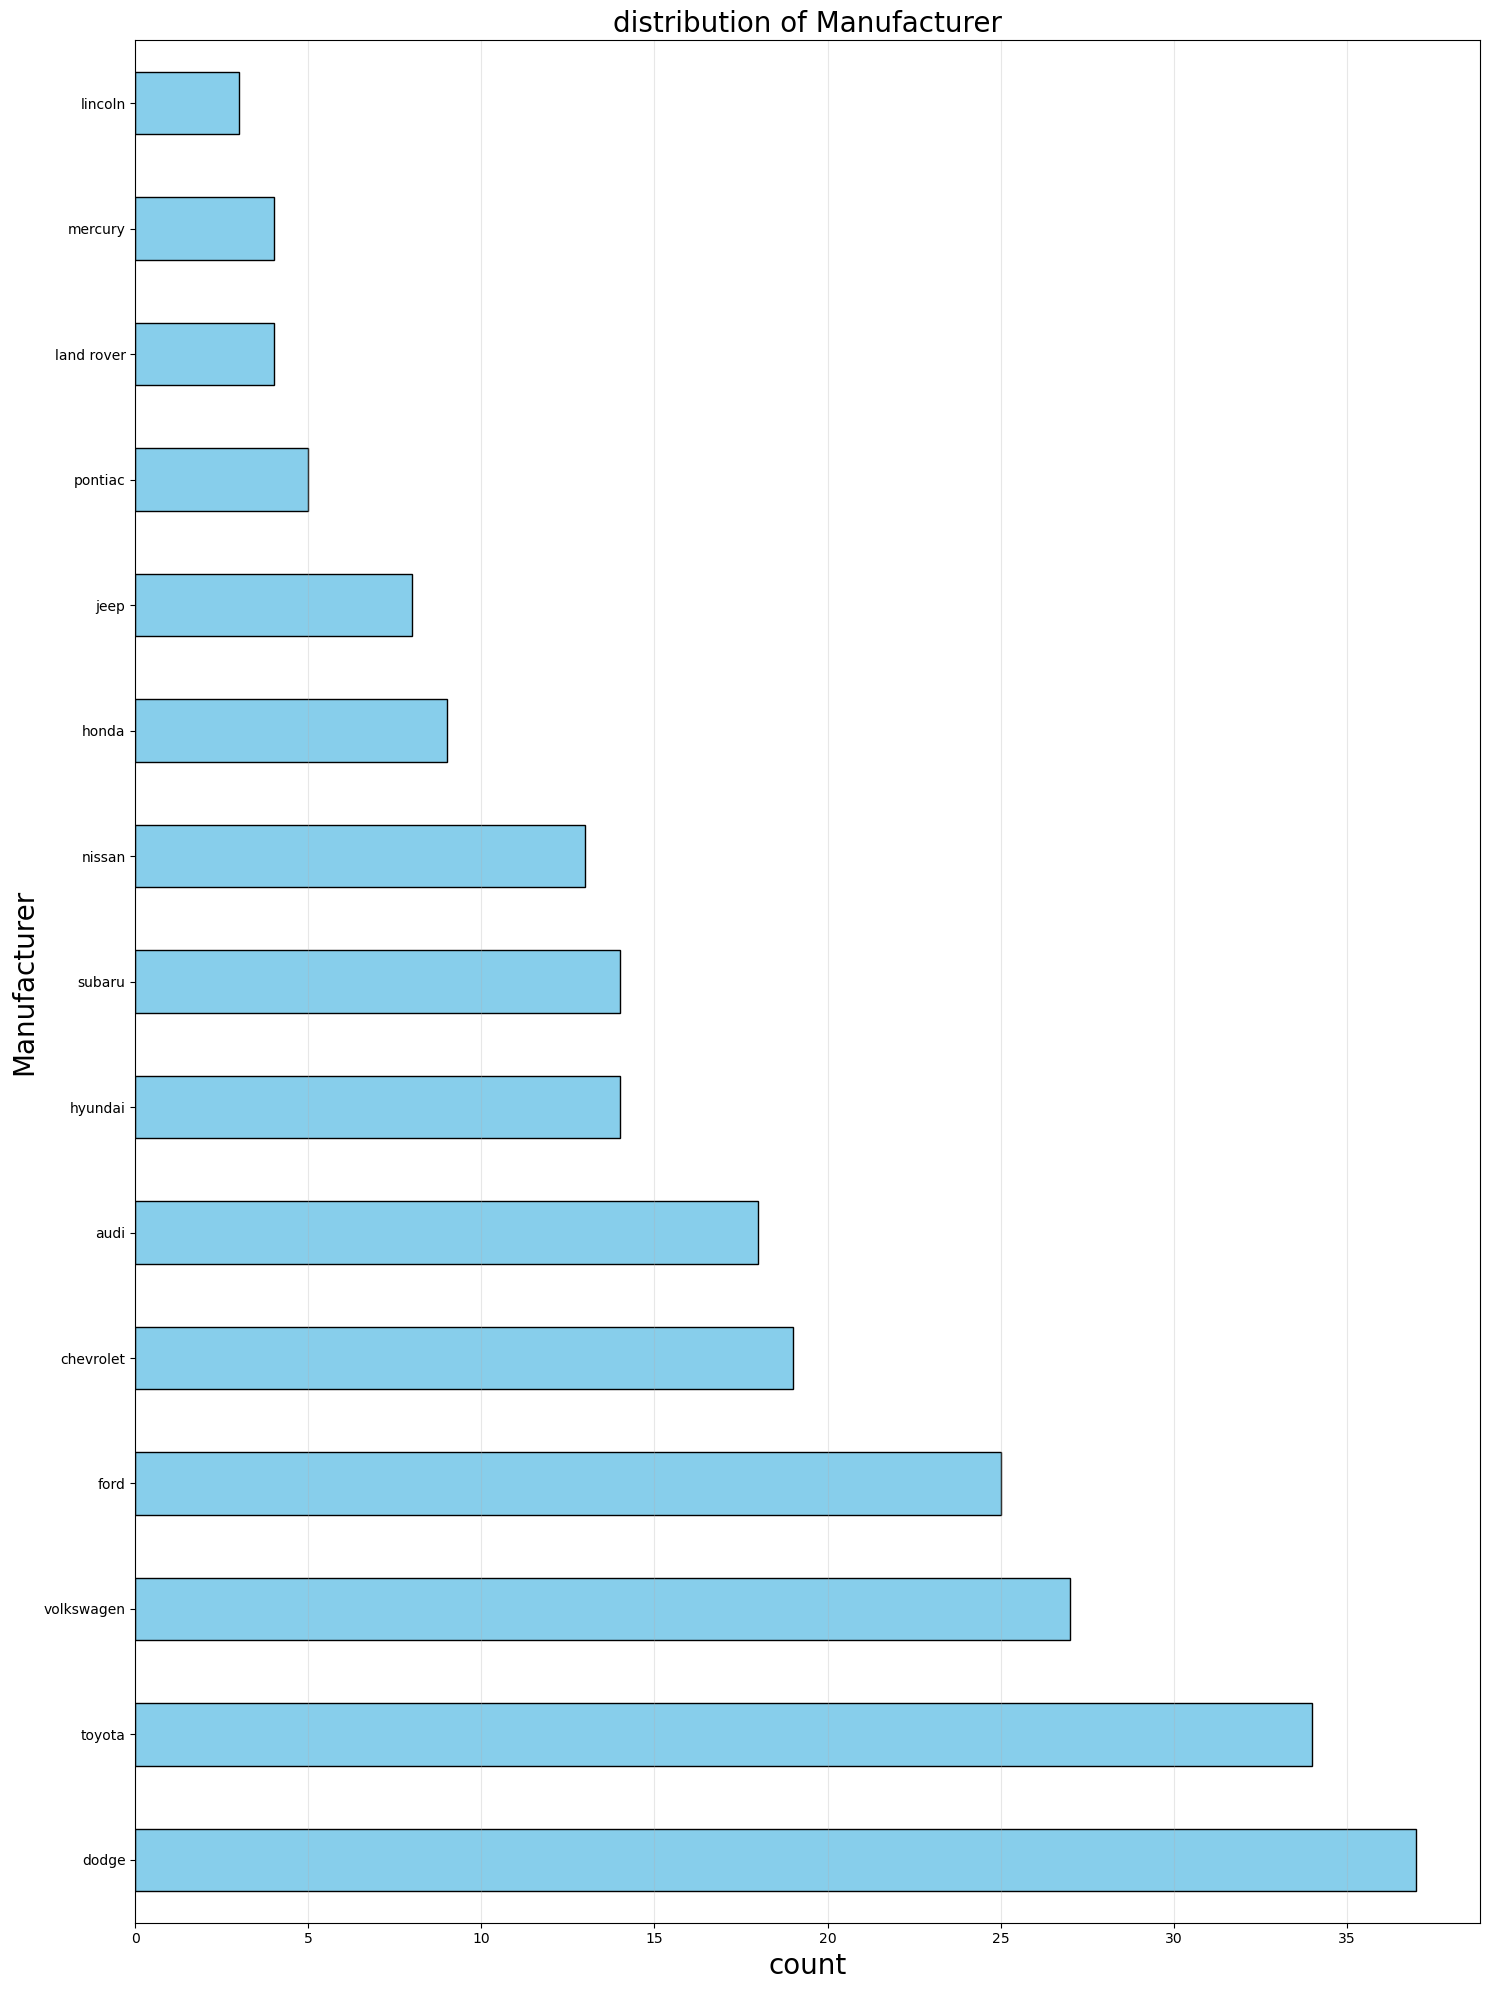

In [97]:
plt.figure(figsize=(15, 20))
count = df['manufacturer'].value_counts()
count.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("distribution of Manufacturer", fontsize=20)
plt.xlabel("count", fontsize=20)
plt.ylabel("Manufacturer", fontsize=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()